In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
import dataframe_image as dfi

In [168]:
pd.set_option("display.max_column", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.width', -1)
pd.set_option('display.max_rows', None)


In [3]:
wildfires_df = pd.read_csv("../data/uncleaned_wildfires_G.csv", encoding="utf-8")

In [4]:
wildfires_df2 = wildfires_df[[
    "FOD_ID", "SOURCE_SYSTEM_TYPE", "NWCG_REPORTING_AGENCY", "SOURCE_REPORTING_UNIT_NAME", 
    "FIRE_NAME", "FIRE_YEAR", "DISCOVERY_DATE", "CONT_DATE", "NWCG_CAUSE_CLASSIFICATION", 
    "NWCG_GENERAL_CAUSE", "FIRE_SIZE", "LATITUDE", "LONGITUDE", "OWNER_DESCR", "STATE", "FIPS_NAME"]]


In [5]:
wildfires_df3 = wildfires_df2.dropna(how='any')

In [8]:
wildfires_clean = wildfires_df3.rename(columns={
    "FOD_ID":"Fire_ID",
    "SOURCE_SYSTEM_TYPE":"Agency_Type",
    "NWCG_REPORTING_AGENCY":"NWCG_Reporting_ Agency",
    "SOURCE_REPORTING_UNIT_NAME":"Reporting_Unit_ Name",
    "FIRE_NAME":"Fire_Name", 
    "FIRE_YEAR":"Year",
    "DISCOVERY_DATE":"Fire_Discovery_Date",
    "CONT_DATE":"Date_Contained",
    "NWCG_CAUSE_CLASSIFICATION":"NWCG_Cause_Classification",
    "NWCG_GENERAL_CAUSE":"Cause_Description",
    "FIRE_SIZE":"Fire_Size",
    "LATITUDE":"Latitude",
    "LONGITUDE":"Longitude",
    "OWNER_DESCR":"Fire_Origin_Land_Owner",
    "STATE":"State",
    "FIPS_NAME":"County"
})
wildfires_clean["County"] = wildfires_clean["County"].str.replace("County","")

In [9]:
wildfires_clean = wildfires_clean.drop(
    wildfires_clean[wildfires_clean[
        "Cause_Description"] == "Missing data/not specified/undetermined"].index)

wildfires_clean = wildfires_clean.drop(wildfires_clean[wildfires_clean["Year"] < 2000].index)

wildfires_clean["Cause_Description"] = wildfires_clean[
    "Cause_Description"].replace("/", " ", regex=True)
    
wildfires_clean.head()

,Fire_ID,Agency_Type,NWCG_Reporting_ Agency,Reporting_Unit_ Name,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,NWCG_Cause_Classification,Cause_Description,Fire_Size,Latitude,Longitude,Fire_Origin_Land_Owner,State,County
0,17,FED,FS,Eldorado National Forest,POWER,2004,10/6/2004,10/21/2004,Human,Equipment and vehicle use,16823.0,38.523333,-120.211667,USFS,CA,Amador
1,18,FED,FS,Eldorado National Forest,FREDS,2004,10/13/2004,10/17/2004,Human,Power generation transmission distribution,7700.0,38.780000,-120.260000,USFS,CA,El Dorado
2,192,FED,FS,Tonto National Forest,THREE,2005,6/21/2005,6/29/2005,Natural,Natural,16100.0,33.723333,-111.275000,USFS,AZ,Gila
3,1520,FED,FS,Gila National Forest,FORK,2005,5/29/2005,8/29/2005,Natural,Natural,11936.0,33.613333,-108.558889,USFS,NM,Catron
5,3601,FED,FS,Nezperce National Forest,RUNNING LAKE,2005,8/10/2005,9/30/2005,Natural,Natural,7404.0,45.923333,-115.025000,USFS,ID,Idaho


In [10]:
wildfires_clean["Cause_Description"].unique()

array(['Equipment and vehicle use',
       'Power generation transmission distribution', 'Natural',
       'Debris and open burning', 'Smoking', 'Recreation and ceremony',
       'Arson incendiarism', 'Fireworks', 'Misuse of fire by a minor',
       'Other causes', 'Railroad operations and maintenance',
       'Firearms and explosives use'], dtype=object)

In [11]:
wildfires_clean.dtypes

Fire_ID                        int64
Agency_Type                   object
NWCG_Reporting_ Agency        object
Reporting_Unit_ Name          object
Fire_Name                     object
Year                           int64
Fire_Discovery_Date           object
Date_Contained                object
NWCG_Cause_Classification     object
Cause_Description             object
Fire_Size                    float64
Latitude                     float64
Longitude                    float64
Fire_Origin_Land_Owner        object
State                         object
County                        object
dtype: object

In [12]:
wildfires_clean["Fire_Discovery_Date"] = pd.to_datetime(wildfires_clean["Fire_Discovery_Date"])
wildfires_clean["Date_Contained"] = pd.to_datetime(wildfires_clean["Date_Contained"])
wildfires_clean.head()

,Fire_ID,Agency_Type,NWCG_Reporting_ Agency,Reporting_Unit_ Name,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,NWCG_Cause_Classification,Cause_Description,Fire_Size,Latitude,Longitude,Fire_Origin_Land_Owner,State,County
0,17,FED,FS,Eldorado National Forest,POWER,2004,2004-10-06,2004-10-21,Human,Equipment and vehicle use,16823.0,38.523333,-120.211667,USFS,CA,Amador
1,18,FED,FS,Eldorado National Forest,FREDS,2004,2004-10-13,2004-10-17,Human,Power generation transmission distribution,7700.0,38.780000,-120.260000,USFS,CA,El Dorado
2,192,FED,FS,Tonto National Forest,THREE,2005,2005-06-21,2005-06-29,Natural,Natural,16100.0,33.723333,-111.275000,USFS,AZ,Gila
3,1520,FED,FS,Gila National Forest,FORK,2005,2005-05-29,2005-08-29,Natural,Natural,11936.0,33.613333,-108.558889,USFS,NM,Catron
5,3601,FED,FS,Nezperce National Forest,RUNNING LAKE,2005,2005-08-10,2005-09-30,Natural,Natural,7404.0,45.923333,-115.025000,USFS,ID,Idaho


In [13]:
wildfires_clean.dtypes

Fire_ID                               int64
Agency_Type                          object
NWCG_Reporting_ Agency               object
Reporting_Unit_ Name                 object
Fire_Name                            object
Year                                  int64
Fire_Discovery_Date          datetime64[ns]
Date_Contained               datetime64[ns]
NWCG_Cause_Classification            object
Cause_Description                    object
Fire_Size                           float64
Latitude                            float64
Longitude                           float64
Fire_Origin_Land_Owner               object
State                                object
County                               object
dtype: object

## Human vs. Natural Wildfires (size G)

In [22]:
humanNatural_df = wildfires_clean[["NWCG_Cause_Classification", "Cause_Description"]]
humanNatural_df = humanNatural_df.value_counts().to_frame("Total_Occurences").reset_index()
humanNatural_df
human_df = humanNatural_df[humanNatural_df['Cause_Description'] != 'Natural']
human_df

,NWCG_Cause_Classification,Cause_Description,Total_Occurences
1,Human,Equipment and vehicle use,167
2,Human,Power generation transmission distribution,73
3,Human,Recreation and ceremony,65
4,Human,Debris and open burning,58
5,Human,Arson incendiarism,53
6,Human,Firearms and explosives use,18
7,Human,Fireworks,9
8,Human,Other causes,9
9,Human,Railroad operations and maintenance,9
10,Human,Smoking,8


In [169]:
dfi.export(human_df, 'humanFires_df.png')

C:\Users\Emily\AppData\Local\Temp\ipykernel_11348\4250661535.py:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(human_df['Total_Occurences'], labels=human_df['Cause_Description'],loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


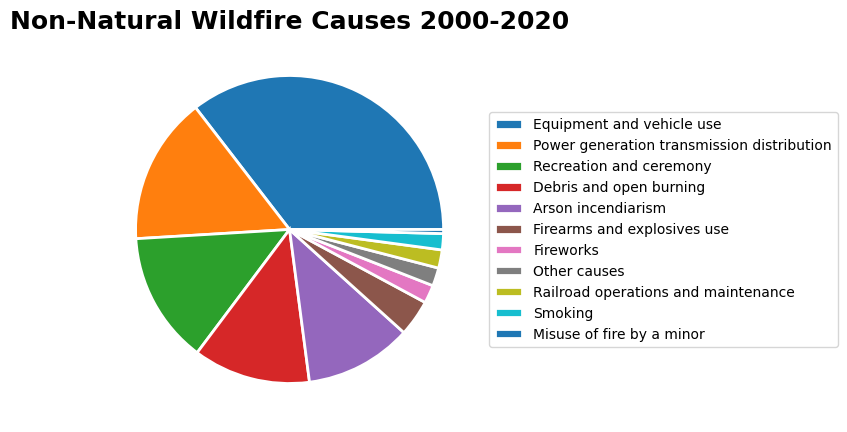

In [200]:
plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect='equal'))
plt.pie(human_df['Total_Occurences'], wedgeprops={'linewidth':2.0, 'edgecolor':'white'},)
plt.legend(human_df['Total_Occurences'], labels=human_df['Cause_Description'],loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Non-Natural Wildfire Causes 2000-2020", weight='bold', size=18)
plt.show()
# plt.savefig("non-natural_causes.png")

## Number of wildfires (size G) recorded per year

In [122]:
fireNumbers_df = wildfires_clean.assign(fire_count=wildfires_clean['Year'].map(wildfires_clean['Year'].value_counts()))
fireNumbers_df = fireNumbers_df[["Year", "fire_count"]]

fireNumbers_df.head()


,Year,fire_count
0,2004,28
1,2004,28
2,2005,91
3,2005,91
5,2005,91


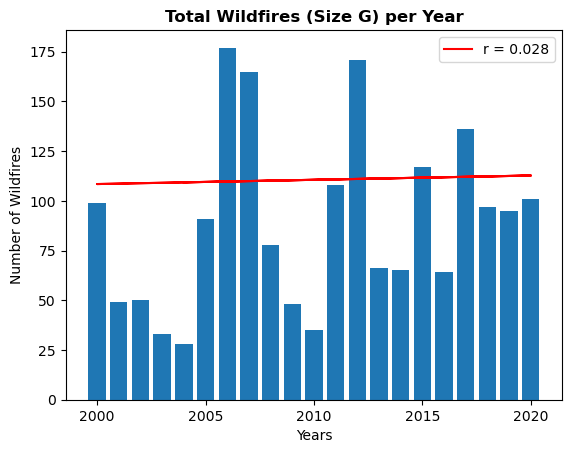

<Figure size 640x480 with 0 Axes>

In [179]:

d_slope, d_int, d_r, d_p, d_std_err = st.linregress(
    fireNumbers_df["Year"], fireNumbers_df["fire_count"])
d_fit = d_slope * fireNumbers_df["Year"] + d_int

plt.bar(
    fireNumbers_df["Year"], fireNumbers_df["fire_count"],  align='center')
plt.xlabel("Years")
plt.ylabel("Number of Wildfires")
plt.title(f"Total Wildfires (Size G) per Year", weight='bold', size=12)
plt.plot(fireNumbers_df["Year"], d_fit, color='r', label=f'r = {d_r:.3f}')
plt.legend(loc='upper right')
plt.show()

# plt.savefig('yearly_fire_total.png')

## Amount of time to contain fires 

In [161]:
containment_df = wildfires_clean
containment_df["Days_to_Contain"] = containment_df[
    "Date_Contained"] - containment_df["Fire_Discovery_Date"]
containment_df = containment_df[[
    "Fire_Name", "Year", "Fire_Discovery_Date", "Date_Contained", 
    "Days_to_Contain", "Fire_Size", "NWCG_Cause_Classification", 
    "Cause_Description", "State"]]

containment_df = containment_df.sort_values(["Days_to_Contain"], ascending=False)

containmentDays_df = containment_df.drop(containment_df[containment_df["Days_to_Contain"] == "0 days"].index)
containmentDays_df

,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,Days_to_Contain,Fire_Size,NWCG_Cause_Classification,Cause_Description,State
4246,BUZZARD,2018,2018-05-22,2019-05-21,364 days,50296.0,Human,Recreation and ceremony,NM
3954,HAYDEN PASS,2016,2016-07-08,2017-06-19,346 days,16562.0,Natural,Natural,CO
3783,JUNKINS,2016,2016-10-17,2017-06-15,241 days,18320.0,Human,Power generation transmission distribution,CO
4478,SWAN LAKE,2019,2019-06-05,2019-12-05,183 days,167182.9,Natural,Natural,AK
184,CARIBOU,2008,2008-06-22,2008-12-16,177 days,13116.0,Natural,Natural,CA
...,...,...,...,...,...,...,...,...,...
4557,RED KATE,2019,2019-03-21,2019-03-22,1 days,5035.4,Human,Recreation and ceremony,NE
2480,FIVE,2005,2005-06-04,2005-06-05,1 days,5514.0,Human,Equipment and vehicle use,CA
4161,303,2017,2017-02-28,2017-03-01,1 days,9299.0,Human,Equipment and vehicle use,TX
4163,DUMAS COMPLEX,2017,2017-03-06,2017-03-07,1 days,28800.0,Human,Equipment and vehicle use,TX


In [201]:
containmentDays_df["Days_to_Contain"].value_counts()

4 days      114
2 days      109
3 days      103
1 days       91
5 days       87
7 days       72
6 days       69
8 days       66
10 days      49
9 days       45
13 days      37
15 days      32
12 days      31
11 days      30
17 days      28
14 days      25
16 days      22
18 days      22
19 days      20
22 days      20
23 days      18
38 days      17
21 days      17
20 days      15
30 days      14
26 days      13
62 days      13
66 days      12
24 days      12
86 days      12
37 days      12
36 days      11
92 days      11
41 days      11
50 days      11
53 days      11
27 days      11
108 days     10
78 days       9
52 days       9
91 days       9
98 days       9
51 days       9
54 days       9
46 days       9
32 days       9
31 days       8
25 days       8
71 days       8
65 days       8
88 days       8
89 days       8
35 days       8
90 days       8
40 days       8
48 days       8
45 days       8
101 days      7
42 days       7
33 days       7
29 days       7
80 days       7
28 days 

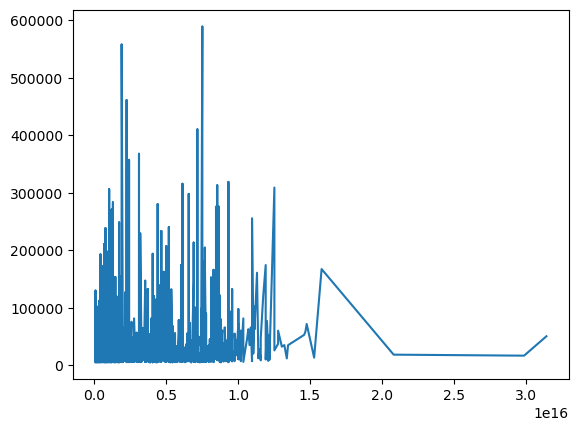

In [209]:
plt.plot(containmentDays_df["Days_to_Contain"], containmentDays_df["Fire_Size"])


In [163]:
sameDay_df = containment_df.loc[containment_df['Days_to_Contain'] == '0 days']
sameDay_df


,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,Days_to_Contain,Fire_Size,NWCG_Cause_Classification,Cause_Description,State
2164,LEVI,2006,2006-05-20,2006-05-20,0 days,8992.0,Natural,Natural,NM
2178,SIX,2007,2007-11-18,2007-11-18,0 days,18000.0,Human,Equipment and vehicle use,NM
2491,MIDWAY,2006,2006-07-11,2006-07-11,0 days,6400.0,Human,Equipment and vehicle use,CA
3993,BYRD,2016,2016-07-26,2016-07-26,0 days,5500.0,Natural,Natural,NM
2175,JET,2006,2006-05-21,2006-05-21,0 days,11000.0,Natural,Natural,NM
...,...,...,...,...,...,...,...,...,...
686,JACKET,2004,2004-06-22,2004-06-22,0 days,17218.9,Natural,Natural,AZ
3182,DUCK LAKE TRAIL,2012,2012-05-23,2012-05-23,0 days,21069.0,Natural,Natural,MI
2827,BURNING TENT,2011,2011-06-18,2011-06-18,0 days,10077.0,Human,Debris and open burning,NM
2172,FOUR LAKES,2006,2006-05-21,2006-05-21,0 days,7600.0,Natural,Natural,NM


In [211]:
top5_df = wildfires_clean.loc[wildfires_clean["Fire_Size"] > 360000]
top5_df

,Fire_ID,Agency_Type,NWCG_Reporting_ Agency,Reporting_Unit_ Name,Fire_Name,Year,Fire_Discovery_Date,Date_Contained,NWCG_Cause_Classification,Cause_Description,Fire_Size,Latitude,Longitude,Fire_Origin_Land_Owner,State,County,Days_to_Contain
2400,1278061,FED,BLM,Jarbidge Field Office,MURPHY COMPLEX,2007,2007-07-21,2007-08-26,Natural,Natural,367785.0,42.036900,-115.108900,BLM,ID,Owyhee,36 days
3121,201507302,FED,BLM,Winnemucca Field Office,HOLLOWAY,2012,2012-08-05,2012-08-31,Natural,Natural,461047.0,41.973300,-118.365000,BLM,OR,Harney,26 days
3134,201508655,FED,BLM,Vale District,LONG DRAW,2012,2012-07-08,2012-07-30,Natural,Natural,558198.3,42.391894,-117.893687,BLM,OR,Malheur,22 days
4304,400305003,FED,FS,Mendocino National Forest,RANCH,2018,2018-07-28,2018-10-19,Human,Equipment and vehicle use,410203.0,39.238889,-123.108611,PRIVATE,CA,Mendocino,83 days
4635,400629554,INTERAGCY,FS,Mendocino National Forest,DOE,2020,2020-08-16,2020-11-11,Natural,Natural,589368.0,39.765255,-122.672914,USFS,CA,Glenn,87 days
